In [1]:
from datetime import datetime
from dotenv import load_dotenv
import os
import json
import pandas as pd
import plotly.graph_objects as go
import requests
import time
from client import FtxClient
load_dotenv()

False

In [2]:
from PIL import Image
import streamlit as st
from urllib.request import urlopen
import client

# Obtener todos los datos del mercado
Puede obtener todos los datos del mercado como se muestra a continuación. Solo obtener datos de mercado no requiere una cuenta en FTX

In [3]:
endpoint_url = 'https://ftx.com/api/markets'
# Get all market data as JSON
all_markets = requests.get(endpoint_url).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(all_markets['result'])
df.set_index('name', inplace = True)

In [3]:
df

,enabled,postOnly,priceIncrement,sizeIncrement,minProvideSize,last,bid,ask,price,type,...,highLeverageFeeExempt,largeOrderThreshold,change1h,change24h,changeBod,quoteVolume24h,volumeUsd24h,priceHigh24h,priceLow24h,tokenizedEquity
name,,,,,,,,,,,,,,,,,,,,,
1INCH-PERP,True,False,1.000000e-04,1.00000,1.00000,0.589000,0.588900,0.589000,0.589000,future,...,False,350.0,0.004948,-0.020781,0.003749,4.005603e+06,4.005603e+06,0.603100,0.574400,NaN
1INCH-0930,True,False,1.000000e-04,1.00000,1.00000,0.585500,0.584400,0.588100,0.585500,future,...,False,350.0,0.001197,-0.025790,0.001540,9.107022e+03,9.107022e+03,0.601300,0.572000,NaN
1INCH-1230,True,False,1.000000e-04,1.00000,1.00000,0.566900,0.566000,0.569500,0.566900,future,...,False,350.0,-0.002814,-0.027783,0.002298,1.258035e+04,1.258035e+04,0.585300,0.556400,NaN
1INCH/USD,True,False,1.000000e-04,1.00000,1.00000,0.589000,0.588800,0.589500,0.589000,spot,...,True,280.0,0.004777,-0.020619,0.003065,1.562425e+06,1.562425e+06,0.603000,0.574500,NaN
AAPL-0930,True,False,1.000000e-02,0.01000,0.01000,150.040000,149.270000,150.430000,150.040000,future,...,False,350.0,0.000000,-0.012895,0.000000,9.818029e+04,9.818029e+04,152.000000,145.130000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XTZBULL/USDT,True,False,1.000000e-08,10000.00000,10000.00000,0.000019,0.000018,0.000019,0.000019,spot,...,True,196.0,0.000000,0.004186,0.000000,1.827700e+01,1.827578e+01,0.000019,0.000017,NaN
XTZHALF/USD,True,False,2.500000e-01,0.00001,0.00001,6423.000000,6179.750000,6219.750000,6219.750000,spot,...,True,280.0,-0.001886,0.001489,-0.000723,0.000000e+00,0.000000e+00,6423.000000,6112.750000,NaN
XTZHEDGE/USD,True,False,5.000000e-03,0.00100,0.00100,65.030000,65.920000,66.760000,65.920000,spot,...,True,280.0,0.002281,-0.005131,0.001063,0.000000e+00,0.000000e+00,68.265000,65.030000,NaN


# Obtener datos del mercado único
También puede obtener datos del mercado único. El siguiente es un ejemplo para obtener datos de mercado de BTC/USD (spot).

In [4]:
base_currency = 'BTC'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

ask                             19530.0
baseCurrency                        BTC
bid                             19529.0
change1h                       0.003855
change24h                       0.04249
changeBod                       0.00463
enabled                            True
futureType                         None
highLeverageFeeExempt              True
isEtfMarket                       False
largeOrderThreshold              2400.0
last                            19530.0
minProvideSize                   0.0001
name                            BTC/USD
postOnly                          False
price                           19530.0
priceHigh24h                    19767.0
priceIncrement                      1.0
priceLow24h                     18563.0
quoteCurrency                       USD
quoteVolume24h           829080765.9457
restricted                        False
sizeIncrement                    0.0001
type                               spot
underlying                         None


# Obtener datos históricos
Puede obtener datos históricos utilizando la solicitud GET. El siguiente es un ejemplo para obtener datos de mercado diarios de BTC/USD desde 2021-01-01.

In [5]:
# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,20132.0,20434.0,19753.0,19951.0,4.367978e+08,2022-09-02
1,19951.0,20053.0,19649.0,19829.0,1.900102e+08,2022-09-03
2,19829.0,20024.0,19580.0,20006.0,3.298889e+08,2022-09-04
3,20006.0,20057.0,19634.0,19793.0,3.515562e+08,2022-09-05
4,19793.0,20180.0,18650.0,18789.0,9.347732e+08,2022-09-06
5,18789.0,19464.0,18523.0,19292.0,4.791565e+08,2022-09-07
6,19292.0,19456.0,19011.0,19318.0,4.416463e+08,2022-09-08
7,19318.0,21612.0,19293.0,21367.0,7.231013e+08,2022-09-09
8,21367.0,21815.0,21130.0,21654.0,3.948259e+08,2022-09-10
9,21654.0,21862.0,21360.0,21833.0,3.062161e+08,2022-09-11


In [ ]:
# Defining ticker variables
Bitcoin = 'BTC-USD'
Ethereum = 'ETH-USD'
Solana = 'SOL-USD'
Dogecoin = 'DOGE-USD'
Monero = 'XMR-USD'
BitcoinCash = 'BCH-USD'
Polkadot = 'DOT-USD'
Dai = 'DAI-USD' 
Polygon = 'MATIC-USD'

## Bitcoin = 'BTC-USD'

In [8]:

1## Bitcoin = 'BTC-USD'
base_currency = 'BTC'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df_btc = pd.DataFrame(requests.get(request_url).json())
df_btc['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df_btc = pd.DataFrame(historical['result'])
# Convert time to date
df_btc['date'] = pd.to_datetime(
    df_btc['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df_btc.drop(['startTime', 'time'], axis=1, inplace=True)
# Volume in USD:
df_btc['volume_fiat'] = df_btc['volume'] * df_btc['close']    
df_btc

,open,high,low,close,volume,date,volume_fiat
0,20132.0,20434.0,19753.0,19951.0,4.367978e+08,2022-09-02,8.714552e+12
1,19951.0,20053.0,19649.0,19829.0,1.900102e+08,2022-09-03,3.767713e+12
2,19829.0,20024.0,19580.0,20006.0,3.298889e+08,2022-09-04,6.599757e+12
3,20006.0,20057.0,19634.0,19793.0,3.515562e+08,2022-09-05,6.958352e+12
4,19793.0,20180.0,18650.0,18789.0,9.347732e+08,2022-09-06,1.756345e+13
5,18789.0,19464.0,18523.0,19292.0,4.791565e+08,2022-09-07,9.243888e+12
6,19292.0,19456.0,19011.0,19318.0,4.416463e+08,2022-09-08,8.531723e+12
7,19318.0,21612.0,19293.0,21367.0,7.231013e+08,2022-09-09,1.545051e+13
8,21367.0,21815.0,21130.0,21654.0,3.948259e+08,2022-09-10,8.549560e+12
9,21654.0,21862.0,21360.0,21833.0,3.062161e+08,2022-09-11,6.685615e+12


In [13]:
# Crypto trade symbol:

crypto_pair = "BTC/USD"

split_pair = crypto_pair.split('/')

symbol = split_pair[0] + '-' + split_pair[1]

# Print crypto symbol
print(symbol)

BTC-USD


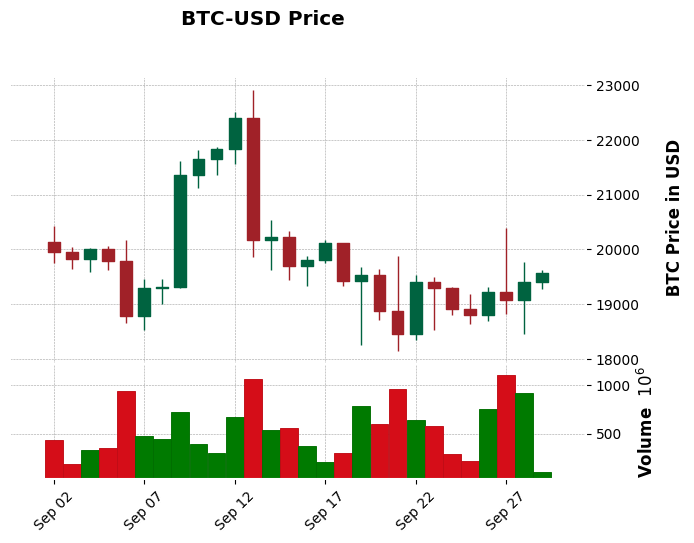

In [14]:
import mplfinance as mpf
# Candlestick Chart

mpf.plot(df_btc.set_index('date').tail(200),
         type = 'candle', style = 'charles',
         volume = True,
         title = symbol + " Price ",
         ylabel = '\n ' + split_pair[0] + ' Price in ' + split_pair[1])

## Ethereum = 'ETH-USD'

In [21]:
base_currency = 'ETH'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,1586.0,1649.0,1545.2,1574.8,6.191071e+08,2022-09-02
1,1574.8,1581.9,1532.6,1557.5,2.306640e+08,2022-09-03
2,1557.5,1582.4,1540.4,1578.8,2.019305e+08,2022-09-04
3,1578.8,1632.2,1557.2,1618.0,3.666926e+08,2022-09-05
4,1618.0,1686.7,1552.2,1558.9,8.348731e+08,2022-09-06
5,1558.9,1659.3,1490.1,1630.1,6.686061e+08,2022-09-07
6,1630.1,1664.0,1595.1,1636.0,6.031625e+08,2022-09-08
7,1636.0,1746.4,1630.8,1719.1,5.853736e+08,2022-09-09
8,1719.1,1790.0,1707.0,1774.7,2.897738e+08,2022-09-10
9,1774.7,1790.3,1718.3,1766.9,2.370949e+08,2022-09-11


## Solana = 'SOL-USD'

In [29]:
base_currency = 'SOL'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,31.6075,32.4025,30.7575,31.2325,5.785159e+07,2022-09-02
1,31.2325,31.2700,30.7925,31.1075,2.322671e+07,2022-09-03
2,31.1075,32.1875,31.0200,32.1625,2.542829e+07,2022-09-04
3,32.1575,32.5175,31.1525,32.1700,4.266535e+07,2022-09-05
4,32.1700,33.8775,30.4400,30.8825,9.130853e+07,2022-09-06
5,30.8825,32.9450,30.3175,32.7000,5.119696e+07,2022-09-07
6,32.7000,33.9775,32.0150,33.6150,6.582154e+07,2022-09-08
7,33.6150,35.9650,33.5925,34.6800,8.008339e+07,2022-09-09
8,34.6800,35.4075,34.2850,35.0425,3.781091e+07,2022-09-10
9,35.0425,36.0325,34.0650,34.9975,4.173761e+07,2022-09-11


## Dogecoin = 'DOGE-USD'

In [28]:
base_currency = 'DOGE'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,0.062370,0.062862,0.060694,0.061643,5.823924e+06,2022-09-02
1,0.061643,0.064052,0.061131,0.062717,5.051014e+06,2022-09-03
2,0.062717,0.063932,0.061865,0.063234,3.592997e+06,2022-09-04
3,0.063234,0.063772,0.060911,0.062745,4.629477e+06,2022-09-05
4,0.062745,0.065303,0.058020,0.058875,7.750090e+06,2022-09-06
5,0.058875,0.061533,0.057357,0.060967,6.291333e+06,2022-09-07
6,0.060970,0.061424,0.059643,0.060977,5.189672e+06,2022-09-08
7,0.060977,0.064911,0.060907,0.063877,7.605126e+06,2022-09-09
8,0.063877,0.065643,0.063159,0.064719,7.989107e+06,2022-09-10
9,0.064719,0.065318,0.062634,0.063728,5.330285e+06,2022-09-11


## Serum = 'SRM-USD'

In [32]:
base_currency = 'SRM'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,0.800,0.809,0.772,0.780,670294.459,2022-09-02
1,0.780,0.786,0.770,0.780,406039.552,2022-09-03
2,0.780,0.828,0.778,0.819,592378.309,2022-09-04
3,0.819,0.826,0.778,0.807,661988.208,2022-09-05
4,0.807,0.824,0.743,0.744,1002278.620,2022-09-06
5,0.744,0.801,0.726,0.791,1218908.700,2022-09-07
6,0.791,0.840,0.782,0.825,1236629.093,2022-09-08
7,0.825,0.880,0.825,0.861,1135617.831,2022-09-09
8,0.861,0.880,0.850,0.866,806597.562,2022-09-10
9,0.866,0.876,0.842,0.860,483239.741,2022-09-11


In [33]:
base_currency = 'MATIC'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,0.884185,0.912874,0.862787,0.871644,2.042922e+07,2022-09-02
1,0.871644,0.890223,0.866688,0.888909,8.953744e+06,2022-09-03
2,0.888909,0.898724,0.872076,0.895142,7.906558e+06,2022-09-04
3,0.895142,0.903113,0.861846,0.882204,9.557948e+06,2022-09-05
4,0.882204,0.923409,0.808612,0.815653,2.151372e+07,2022-09-06
5,0.815653,0.850744,0.791729,0.840434,1.921639e+07,2022-09-07
6,0.840434,0.849655,0.815628,0.845107,1.158470e+07,2022-09-08
7,0.845107,0.901466,0.842312,0.890706,1.428658e+07,2022-09-09
8,0.890706,0.912524,0.878257,0.905982,9.460952e+06,2022-09-10
9,0.905982,0.917968,0.876246,0.893493,5.210757e+06,2022-09-11


## BitcoinCash = 'BCH-USD'

In [34]:
base_currency = 'BCH'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,116.750,120.400,114.775,116.475,3.223389e+06,2022-09-02
1,116.475,119.250,115.875,117.825,1.849876e+06,2022-09-03
2,117.825,118.475,115.850,118.450,1.539320e+06,2022-09-04
3,118.450,126.500,117.100,125.775,5.774521e+06,2022-09-05
4,125.775,128.000,111.700,112.125,8.900254e+06,2022-09-06
5,112.125,119.575,110.125,118.775,7.146183e+06,2022-09-07
6,118.775,130.500,115.925,126.675,1.021311e+07,2022-09-08
7,126.675,138.850,126.050,132.875,8.758832e+06,2022-09-09
8,132.875,135.075,130.475,132.700,3.358318e+06,2022-09-10
9,132.700,133.350,127.375,130.275,3.026568e+06,2022-09-11


## Polkadot = 'DOT-USD'


In [43]:
base_currency = 'DOT'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,7.180,7.569,7.120,7.300,5.210951e+06,2022-09-02
1,7.300,7.308,7.171,7.288,2.786157e+06,2022-09-03
2,7.288,7.421,7.151,7.377,4.553071e+06,2022-09-04
3,7.377,7.637,7.256,7.365,5.900049e+06,2022-09-05
4,7.365,7.691,6.807,6.873,7.110494e+06,2022-09-06
5,6.873,7.296,6.752,7.197,6.318460e+06,2022-09-07
6,7.197,7.460,7.034,7.387,5.205551e+06,2022-09-08
7,7.387,7.939,7.360,7.759,7.865304e+06,2022-09-09
8,7.759,7.877,7.592,7.778,3.485494e+06,2022-09-10
9,7.778,7.898,7.548,7.701,3.814880e+06,2022-09-11




## Dai = 'DAI-USD' 


In [44]:
base_currency = 'DOT'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df

,open,high,low,close,volume,date
0,7.180,7.569,7.120,7.300,5.210951e+06,2022-09-02
1,7.300,7.308,7.171,7.288,2.786157e+06,2022-09-03
2,7.288,7.421,7.151,7.377,4.553071e+06,2022-09-04
3,7.377,7.637,7.256,7.365,5.900049e+06,2022-09-05
4,7.365,7.691,6.807,6.873,7.110494e+06,2022-09-06
5,6.873,7.296,6.752,7.197,6.318460e+06,2022-09-07
6,7.197,7.460,7.034,7.387,5.205551e+06,2022-09-08
7,7.387,7.939,7.360,7.759,7.865304e+06,2022-09-09
8,7.759,7.877,7.592,7.778,3.485494e+06,2022-09-10
9,7.778,7.898,7.548,7.701,3.814880e+06,2022-09-11


## Dai = 'DAI-USD' 


In [ ]:
base_currency = 'DOT'
quote_currency = 'USD'
# Specify the base and quote currencies to get single market data
request_url = f'{endpoint_url}/{base_currency}/{quote_currency}'
df = pd.DataFrame(requests.get(request_url).json())
df['result']

# 1 day = 60 * 60 * 24 seconds
daily=str(60*60*24)
# Start date = 2021-01-01
start_date = datetime(2022, 9, 1).timestamp()
# Get the historical market data as JSON
historical = requests.get(
    f'{request_url}/candles?resolution={daily}&start_time={start_date}'
).json()
# Convert JSON to Pandas DataFrame
df = pd.DataFrame(historical['result'])
# Convert time to date
df['date'] = pd.to_datetime(
    df['time']/1000, unit='s', origin='unix'
) 
# Remove unnecessar columns
df.drop(['startTime', 'time'], axis=1, inplace=True)
df